    valores de fi:  [ 1.   0.9 -1.  -2.3  1.8]
divisores en L(i):  [24. -6.  4. -6. 24.]

Polinomio de Lagrange, expresiones
-0.15*x*(x - 4)*(x - 3)*(x - 2) - 0.25*x*(x - 4)*(x - 3)*(x - 1) + 0.383333333333333*x*(x - 4)*(x - 2)*(x - 1) + 0.075*x*(x - 3)*(x - 2)*(x - 1) + 0.0416666666666667*(x - 4)*(x - 3)*(x - 2)*(x - 1)

Polinomio de Lagrange: 
0.1*x**4 - 0.2*x**3 - 1.0*x**2 + 1.0*x + 1.0


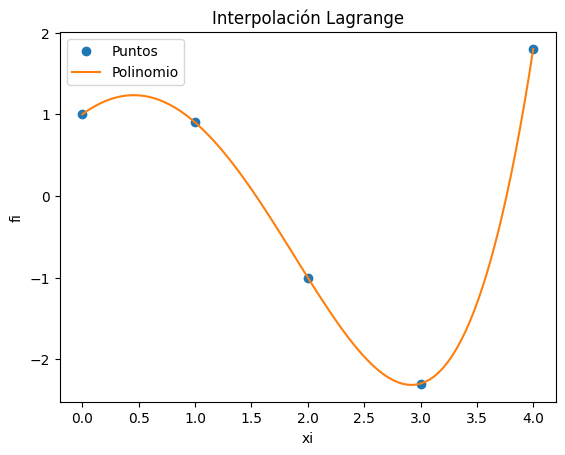

Polinomios por tramos: 
  x = [0,1]
1 - 0.1*x
  x = [1,2]
2.8 - 1.9*x
  x = [2,3]
1.6 - 1.3*x
  x = [3,4]
4.1*x - 14.6


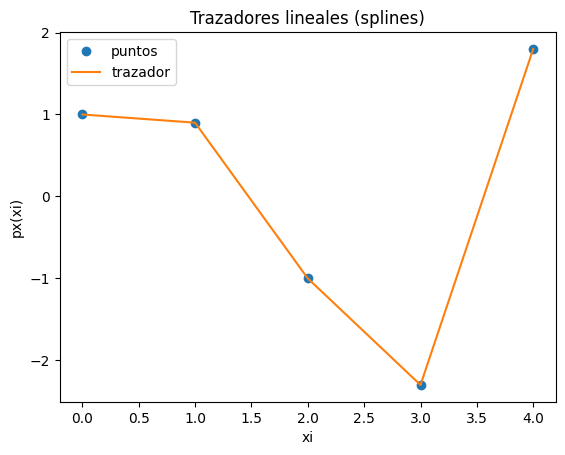

Polinomios por tramos: 
 x = [0,1]
-0.428571428571429*x**3 + 0.328571428571429*x + 1.0
 x = [1,2]
0.342857142857143*x**3 - 2.31428571428571*x**2 + 2.64285714285714*x + 0.228571428571429
 x = [2,3]
1.45714285714286*x**3 - 9.0*x**2 + 16.0142857142857*x - 8.68571428571429
 x = [3,4]
-1.37142857142857*x**3 + 16.4571428571429*x**2 - 60.3571428571428*x + 67.6857142857143


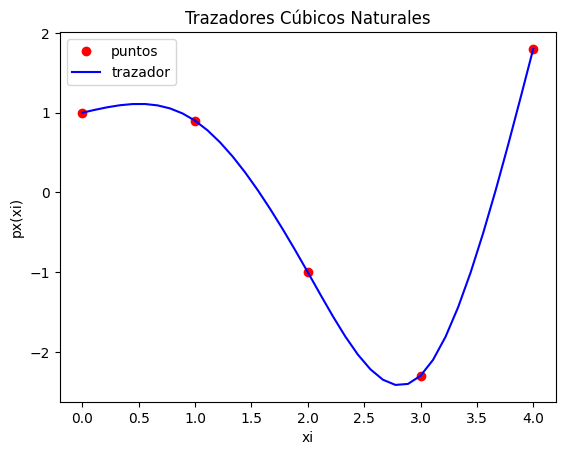

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


xi = np.array([0, 1, 2, 3, 4])
fi = np.array([1,0.9,-1,-2.3,1.8])

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplificar el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()

# Trazador (spline) lineal, grado 1
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def trazalineal(xi,fi):
    n = len(xi)
    x = sym.Symbol('x')
    px_tabla = []
    
    tramo = 1
    while not(tramo>=n):
        # con 1ra diferencia finita avanzada 
        numerador = fi[tramo]-fi[tramo-1]
        denominador = xi[tramo]-xi[tramo-1]
        m = numerador/denominador
        pxtramo = fi[tramo-1] + m*(x-xi[tramo-1])
        px_tabla.append(pxtramo)
        tramo = tramo + 1
        
    return(px_tabla)


# INGRESO , Datos de prueba
xi = [0, 1, 2, 3, 4]
fi = [1,0.9,-1,-2.3,1.8]
muestras = 10 

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = trazalineal(xi,fi)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print('  x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))


    # GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)

    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,'o', label='puntos')
plt.plot(xtraza,ytraza, label='trazador')
plt.title('Trazadores lineales (splines)')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()


# Trazador cúbico natural
# Condición: S''(x_0) = S''(x_n) = 0
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def traza3natural(xi,yi):
    n = len(xi)
    
    # Valores h
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)
        
    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)
    
    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]
    
    # Polinomio trazador
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]
        
        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)
    
    return(px_tabla)


# INGRESO , Datos de prueba
xi = np.array([0, 1, 2, 3, 4])
fi = np.array([1,0.9,-1,-2.3,1.8])
muestras = 10 

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = traza3natural(xi,fi)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

    # GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)
    
    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador'
         , color='blue')
plt.title('Trazadores Cúbicos Naturales')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()